# Multiple Choice Question Solutions

### Q1 - Answer - (a)

Explanation:- Option a is the only set where all points in the line segment joining any two points of the set are entirely contained within the set.

### Q2 - Answer - (a)

Explanation:- Option a is the only function where the line segment joining any two points lies above the graph of the function between the two points. options c and d are either linear or partly linear, they are not strictly convex

### Q3 - Answer - (a)

Explanation:- The solution to linear programming is found at the vertex/corner point/extreme points. The other options do not correspond to vertices and are therefore wrong.

### Q4 - Answer - (a),(b)

Explanation:- Linear equations are considered both concave and convex at the same time. Other options are incorrect.

### Q5 - Answer - (a)

Explanation:- Users in treatment and control group see the same version in A/A testing. This is a step generally done before doing A/B testing to ensure sanity between the two groups to ensure that the two groups do not respond differently to the base variant.

### Q6 - Answer - (a)

Explanation:- Option a is the only set where the line segment joining any two points is entirely contained within the set.


# Formulation Question

## Problem Formulation

### 1. Decision Variables

Following are the decision variables in the problem 

### 2. Objective Function

### 3. Constraints

\begin{align}
\text{minimize} \quad &-x_1-x_2\\
\text{s.t.}\quad & x_1 +2x_2\leq 3\\
& 2x_1+x_2\leq 3\\
& x_1,x_2\geq 0
\end{align}




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

In [2]:
%matplotlib inline

In [3]:
# Create a function to solve for the optimal values of Decision Variables and perform sensitivity analysis for Geico
# Parameter Passed : 
#         geico_sports_ctr : Geico Sports Section Clickthrough Rate
#         geico_national_ctr : Geico National Section Clickthrough Rate

def CalcOptimalPageView(geico_sports_ctr, geico_national_ctr, printoutput = True):

    # Create the Model
    optimal = gp.Model("pageviews")
    optimal.setParam('OutputFlag', True)

    # Adding the variables 
    x1 = optimal.addVar(lb = 2000000,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x1") 
    x2 = optimal.addVar(lb = 1000000,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x2") 
    x3 = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x3") 
    x4 = optimal.addVar(lb = 1000000,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x4") 
    x5 = optimal.addVar(lb = 1000000,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x5") 
    x6 = optimal.addVar(lb = 1000000 ,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x6") 
    x7 = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x7") 
    x8 = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="x8") 

    # Adding the constraints
    optimal.addConstr(x3+x4 >= 2000000, 'cons1')
    optimal.addConstr(x5+x6 >= 3000000, 'cons2')
    optimal.addConstr(x7+x8 >= 2000000, 'cons3')
    optimal.addConstr(x1+x3+x5+x7 <= 6000000, 'cons4')
    optimal.addConstr(x2+x4+x6+x8 <= 5000000, 'cons5')

    # Adding the objective functions
    objective = 2.4 * (x1*geico_sports_ctr + x2*geico_national_ctr + x3*0.02 + x4*0.01 + x5*0.01 + x6*0.03 + x7*0.015 + x8*0.02)

    # Solve
    optimal.setObjective(objective,GRB.MAXIMIZE)
    optimal.optimize()
    
    if printoutput:
        # Display optimal values of decision variables
        print("x1 :", x1.X)
        print("x2 :", x2.X)
        print("x3 :", x3.X)
        print("x4 :", x4.X)
        print("x5 :", x5.X)
        print("x6 :", x6.X)
        print("x7 :", x7.X)
        print("x8 :", x8.X)

        # Display optimal value of the objective function
        print('Optimal Objective: ', optimal.objVal)

    # Return an array of solution for visualization purposes
    optimal_array = np.array([x1.X, x2.X, x3.X, x4.X, x5.X, x6.X, x7.X, x8.X, optimal.objVal])
    return optimal_array



In [4]:
# Find the optimal solution
base_solution = CalcOptimalPageView(0.025,0.008)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-06-09
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x7d5ee073
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 7e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 5 rows, 7 columns, 13 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.8320000e+05   3.750000e+05   0.000000e+00      0s
       3    5.2320000e+05   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.232000000e+05
x1 : 3000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 2000000.0
x7 : 1000000.0
x8 : 1000000.0
Optimal Objective:  5232

In [5]:
solution_1 = CalcOptimalPageView(0.005,0.005)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x9c3094fd
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 7e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.4400000e+05   2.500000e+05   0.000000e+00      0s
       1    4.2000000e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.200000000e+05
x1 : 2000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 3000000.0
x7 : 2000000.0
x8 : 0.0
Optimal Objective:  420000.0


In [6]:
solution_2 = CalcOptimalPageView(0.01,0.01)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x0204b731
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 7e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8000000e+05   2.500000e+05   0.000000e+00      0s
       1    4.5600000e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.560000000e+05
x1 : 2000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 3000000.0
x7 : 2000000.0
x8 : 0.0
Optimal Objective:  456000.0


In [7]:
solution_3 = CalcOptimalPageView(0.015,0.015)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0xb97633a3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 7e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.1600000e+05   2.500000e+05   0.000000e+00      0s
       1    4.9200000e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.920000000e+05
x1 : 2000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 3000000.0
x7 : 2000000.0
x8 : 0.0
Optimal Objective:  492000.0


In [8]:
solution_4 = CalcOptimalPageView(0.02,0.02)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x7d5ba590
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 7e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolved: 5 rows, 7 columns, 13 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.5200000e+05   2.503750e+05   0.000000e+00      0s
       2    5.2800000e+05   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.280000000e+05
x1 : 2000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 3000000.0
x7 : 2000000.0
x8 : 0.0
Optimal Objective:  528000.0


In [9]:
solution_5 = CalcOptimalPageView(0.025,0.025)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x5303d41d
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 7e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolved: 5 rows, 7 columns, 13 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.2400000e+05   3.750000e+05   0.000000e+00      0s
       3    5.6400000e+05   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.640000000e+05
x1 : 3000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 2000000.0
x7 : 1000000.0
x8 : 1000000.0
Optimal Objective:  564000.0


In [10]:
solution_6 = CalcOptimalPageView(0.03,0.03)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0xb46c78a0
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 7e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve time: 0.01s
Presolved: 5 rows, 8 columns, 14 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5800000e+30   6.250000e+30   2.580000e+00      0s
       6    6.1200000e+05   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.120000000e+05
x1 : 3000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 2000000.0
x7 : 1000000.0
x8 : 1000000.0
Optimal Objective:  612000.0


In [11]:
solution_7 = CalcOptimalPageView(0.035,0.035)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x277074ea
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 8e-02]
  Bounds range     [1e+06, 2e+06]
  RHS range        [2e+06, 6e+06]
Presolve time: 0.00s
Presolved: 5 rows, 8 columns, 14 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.7720000e+30   6.250000e+30   2.772000e+00      0s
       6    6.6000000e+05   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.600000000e+05
x1 : 3000000.0
x2 : 1000000.0
x3 : 1000000.0
x4 : 1000000.0
x5 : 1000000.0
x6 : 2000000.0
x7 : 1000000.0
x8 : 1000000.0
Optimal Objective:  660000.0


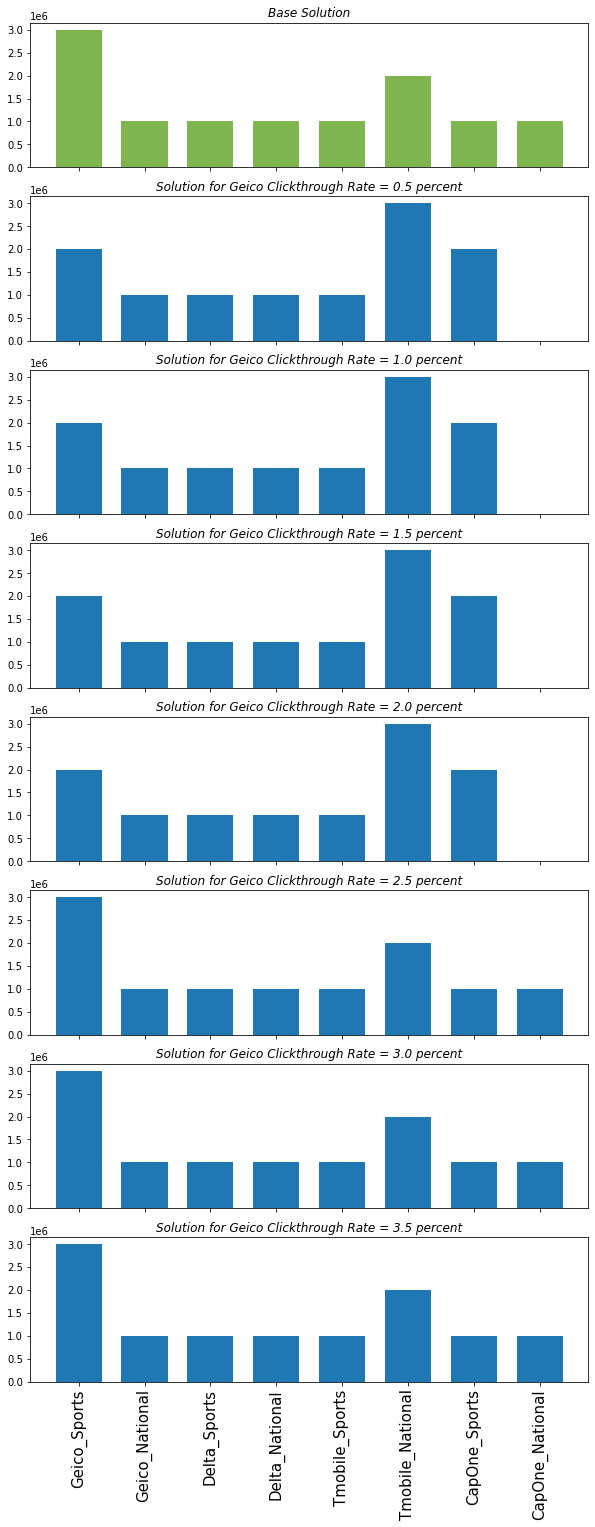

In [50]:
# Visualize sensitivity analysis
x = np.array(["Geico_Sports", "Geico_National", "Delta_Sports", "Delta_National", "Tmobile_Sports", "Tmobile_National", "CapOne_Sports", "CapOne_National"])
y_base = base_solution
plt.figure(figsize=(10, 25))
fig, axs = plt.subplots(8, 1,sharex='col')
axs[0].bar(x,y_base[:8], color = '#7eb54e', width=0.7)
axs[0].set_title('Base Solution', fontstyle='italic')
axs[1].bar(x,solution_1[:8], width=0.7)
axs[1].set_title('Solution for Geico Clickthrough Rate = 0.5 percent', fontstyle='italic')
axs[2].bar(x,solution_2[:8], width=0.7)
axs[2].set_title('Solution for Geico Clickthrough Rate = 1.0 percent', fontstyle='italic')
axs[3].bar(x,solution_3[:8], width=0.7)
axs[3].set_title('Solution for Geico Clickthrough Rate = 1.5 percent', fontstyle='italic')
axs[4].bar(x,solution_4[:8], width=0.7)
axs[4].set_title('Solution for Geico Clickthrough Rate = 2.0 percent', fontstyle='italic')
axs[5].bar(x,solution_5[:8], width=0.7)
axs[5].set_title('Solution for Geico Clickthrough Rate = 2.5 percent', fontstyle='italic')
axs[6].bar(x,solution_6[:8], width=0.7)
axs[6].set_title('Solution for Geico Clickthrough Rate = 3.0 percent', fontstyle='italic')
axs[7].bar(x,solution_7[:8], width=0.7)
axs[7].set_title('Solution for Geico Clickthrough Rate = 3.5 percent', fontstyle='italic')
plt.xticks(fontsize = 15, rotation = 90)
plt.show()

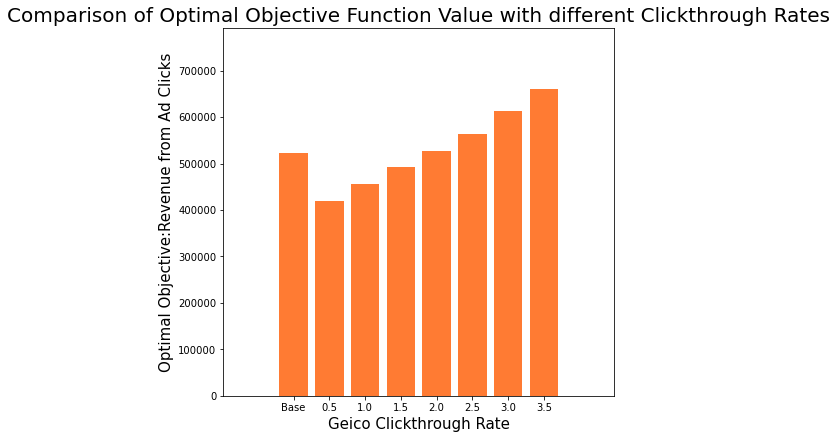

In [58]:
x = np.array(["Base", "0.5", "1.0","1.5","2.0","2.5","3.0","3.5"])
y = np.array([base_solution[8],solution_1[8],solution_2[8],solution_3[8],solution_4[8],solution_5[8],solution_6[8],solution_7[8]])
plt.figure(figsize=(7, 7))
plt.bar(x,y, color = "#FF7B33")
plt.title("Comparison of Optimal Objective Function Value with different Clickthrough Rates",fontsize=20)
plt.xlabel("Geico Clickthrough Rate", fontsize=15)
plt.ylabel("Optimal Objective:Revenue from Ad Clicks",fontsize=15)
#plt.xticks(rotation = 90)
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()